###Ejercicio 5.1.1 Oscilador armonico
\begin{equation}
\dot{x}=v
\end{equation}
\begin{equation}
\dot{v}=-ω^{2}x
\end{equation}

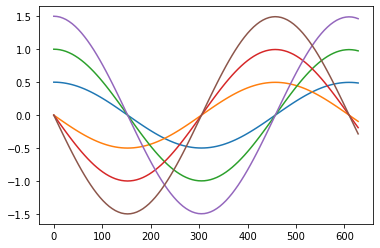

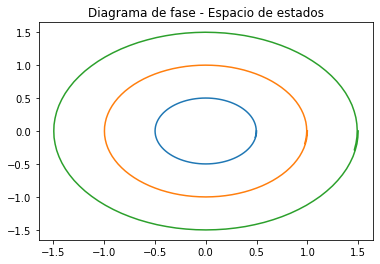

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def harmonic_oscillator(t, z, omega):
  #ejemplo 5.1.1 pag 134
  dz = [z[1], -z[0]*omega**2]
  return dz

fg_time,ax_time = plt.subplots()
fg_ss,ax_ss=plt.subplots()

tend=200*np.pi
omega=1

for z0_1 in np.linspace(0.5,1.5,3):
  z0 = [z0_1,0]
  sol = solve_ivp(harmonic_oscillator,[0,tend],z0,args=(omega,), dense_output=True)

  t = np.linspace(0,tend,100)
  z = sol.sol(t)

  #plt.plot(sol.t,sol.y[0,:])
  ax_time.plot(t,z[0,:])
  ax_time.plot(t,z[1,:])

  ax_ss.set_title('Diagrama de fase - Espacio de estados')
  ax_ss.plot(z[0,:],z[1,:])

###Ejemplo 5.2.1 Strogatz
\begin{equation}
\dot{x}=x+y
\end{equation}
\begin{equation}
\dot{y}=4x-2y
\end{equation}
Sujeto a la condición inicial $(x_0,y_0)=(2,-3)$

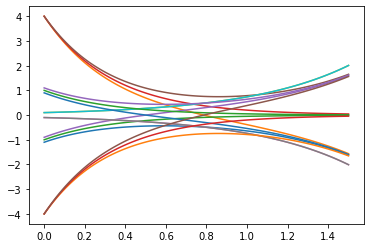

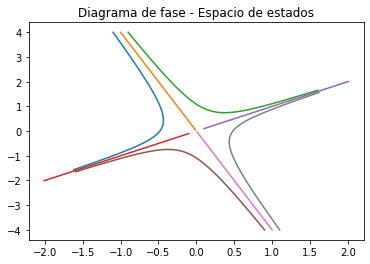

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def harmonic_oscillator(t, z):
  #ejemplo clase
  dz = [z[1]+z[0], 4*z[0]-2*z[1]]
  return dz

fg_time,ax_time = plt.subplots()
fg_ss,ax_ss=plt.subplots()

tend=1.5
omega=1
z0=np.array([[-1.1,4],[-1,4],[-0.9,4],[-0.1,-0.1],[0.1,0.1],[0.9,-4],[1,-4],[1.1,-4]])

for i in range(8):
  #z0 = z0_v[i,:]
  sol = solve_ivp(harmonic_oscillator,[0,tend],z0[i,:], dense_output=True)

  t = np.linspace(0,tend,100)
  z = sol.sol(t)

  #plt.plot(sol.t,sol.y[0,:])
  ax_time.plot(t,z[0,:])
  ax_time.plot(t,z[1,:])

  ax_ss.set_title('Diagrama de fase - Espacio de estados')
  ax_ss.plot(z[0,:],z[1,:])

###Ejercicio 5.2.1 Strogatz
\begin{equation}
\dot{x}=4x-y
\end{equation}
\begin{equation}
\dot{y}=2x+y
\end{equation}

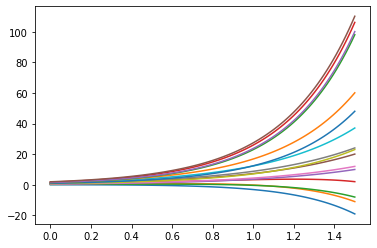

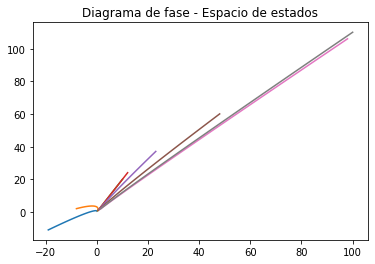

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def Ejercicio_518(t, z):
  #ejemplo clase
  dz = [4*z[0]-z[1], 2*z[0]+z[1]]
  return dz

fg_time,ax_time = plt.subplots()
fg_ss,ax_ss=plt.subplots()

tend=1.5
omega=1
z0=np.array([[0.1,0.5],[0.3,0.8],[0.5,1],[0.6,1.2],[0.8,1.5],[1,1.6],[1.4,1.8],[1.5,2]])

for i in range(8):
  #z0 = z0_v[i,:]
  sol = solve_ivp(Ejercicio_518,[0,tend],z0[i,:], dense_output=True)

  t = np.linspace(0,tend,100)
  z = sol.sol(t)

  #plt.plot(sol.t,sol.y[0,:])
  ax_time.plot(t,z[0,:])
  ax_time.plot(t,z[1,:])

  ax_ss.set_title('Diagrama de fase - Espacio de estados')
  ax_ss.plot(z[0,:],z[1,:])

###Ejercicio 5.3.3
\begin{equation}
\dot{R}=aJ
\end{equation}
\begin{equation}
\dot{J}=bR
\end{equation}

In [ ]:
styles=["-","--",":","_"]
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from scipy.integrate import solve_ivp
from ipywidgets import interact

a = sp.Symbol('a')
b = sp.Symbol('b')
A=sp.Matrix([[0,a],
           [b,0]])
delta=sp.det(A)
traza=sp.trace(A)
L=A.eigenvals()
V=A.eigenvects()
#print('valores propios',L,'\ntraza =',traza,'\ndeterminante =',delta)

para a= -1 y b = -1 Con traza = 0 y con determinante = -1.0


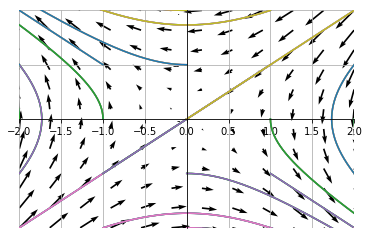

para a= -1 y b = 1 Con traza = 0 y con determinante = 1.0


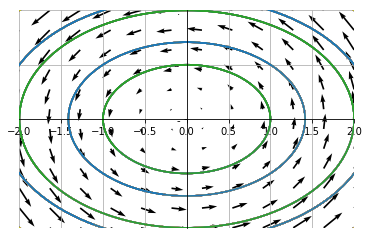

para a= 1 y b = -1 Con traza = 0 y con determinante = 1.0


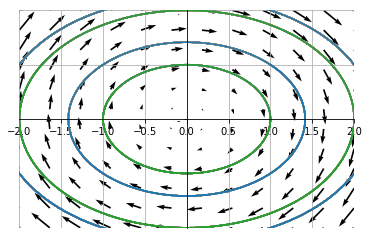

para a= 1 y b = 1 Con traza = 0 y con determinante = -1.0


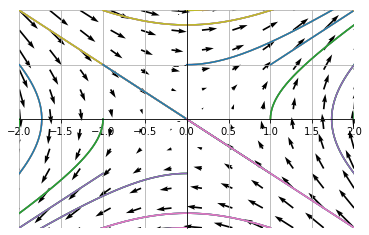

In [ ]:
for a in [-1,1]:
  for b in [-1,1]:
    A=np.array([[0,a],
              [b,0]])
    delta=np.linalg.det(A)
    traza=np.trace(A)
    print('para a=',a,'y b =',b,'Con traza =',traza,'y con determinante =',delta)
    X,Y=np.meshgrid(np.linspace(-2,2,12),np.linspace(-2,2,12))
    V= b*X
    U= a*Y
    fig, ax = plt.subplots()
    Q= ax.quiver(X,Y,U,V,units ='width')

    def vdp(t,z):
      x,y=z
      #Donde, j=y
      return[a*y,b*x] #Ecuaciones del sistema

    ti,tf=0,10
    t=np.linspace(ti,tf,500)
    for x0 in range(-2 , 3):
      for y0 in range(-2 , 3):
        for style in zip(styles):
          sol=solve_ivp(vdp,[ti,tf],[x0,y0],t_eval=t)
          plt.plot(sol.y[0],sol.y[1],style)
        plt.axis([-2,2,-2,2])
        plt.grid()
    ax.spines['left'].set_position(('data',0.0))
    ax.spines['bottom'].set_position(('data',0.0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()

###Ejercicio 5.3.4 Fuego y agua
\begin{equation}
\dot{R}=aR + bJ
\end{equation}
\begin{equation}
\dot{J}=-bR-aJ
\end{equation}

para a= 1 y b = 2 Con traza = 0 y con determinante = 2.9999999999999996


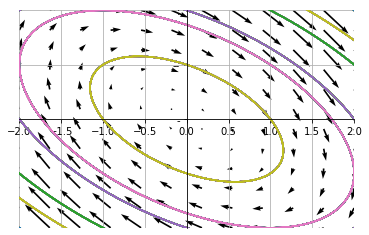

para a= 2 y b = 2 Con traza = 0 y con determinante = 0.0


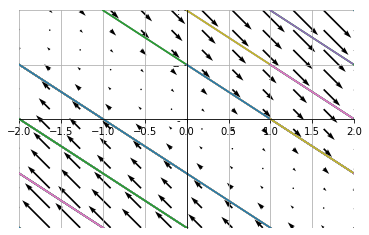

para a= 3 y b = 2 Con traza = 0 y con determinante = -5.000000000000001


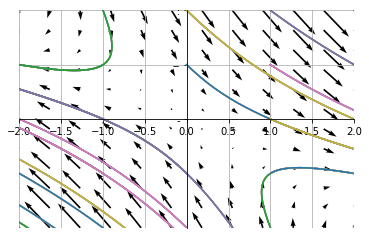

In [ ]:
a = sp.Symbol('a')
b = sp.Symbol('b')
A=sp.Matrix([[a,b],
           [-b,-a]])
delta=sp.det(A)
traza=sp.trace(A)
L=A.eigenvals()
V=A.eigenvects()
#print('valores propios',L,'\ntraza =',traza,'\ndeterminante =',delta)

for a in [1,2,3]:
    b = 2
    A=np.array([[a,b],
              [-b,-a]])
    delta=np.linalg.det(A)
    traza=np.trace(A)
    print('para a=',a,'y b =',b,'Con traza =',traza,'y con determinante =',delta)
    X,Y=np.meshgrid(np.linspace(-2,2,12),np.linspace(-2,2,12))
    V= -b*X-a*Y
    U= a*X+ b*Y
    fig, ax = plt.subplots()
    Q= ax.quiver(X,Y,U,V,units ='width')

    def vdp(t,z):
      x,y=z
      #Donde, j=y
      return[a*x+ b*y,-b*x-a*y] #Ecuaciones del sistema

    ti,tf=0,10
    t=np.linspace(ti,tf,500)
    for x0 in range(-4 , 3):
      for y0 in range(-4 , 3):
        for style in zip(styles):
          sol=solve_ivp(vdp,[ti,tf],[x0,y0],t_eval=t)
          plt.plot(sol.y[0],sol.y[1],style)
        plt.axis([-2,2,-2,2])
        plt.grid()
    ax.spines['left'].set_position(('data',0.0))
    ax.spines['bottom'].set_position(('data',0.0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.show()

###Ejercicio 5.3.6 Romeo el robot
\begin{equation}
\dot{R}=0
\end{equation}
\begin{equation}
\dot{J}=aR+bJ
\end{equation}

para a= 1 y b = 1 Con traza = 1 y con determinante = 0.0


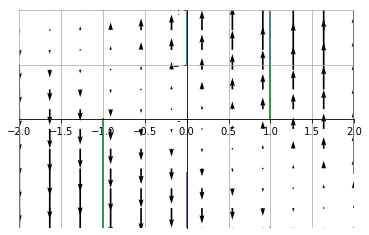

para a= 1 y b = 0 Con traza = 0 y con determinante = 0.0


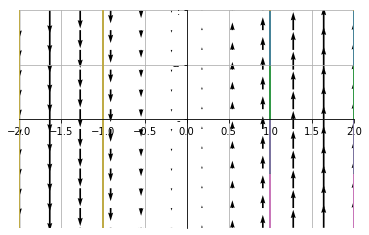

para a= 1 y b = -1 Con traza = -1 y con determinante = 0.0


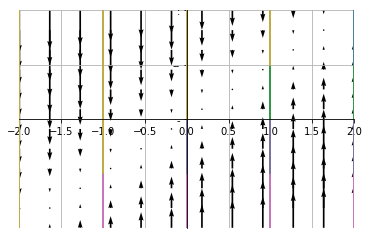

In [ ]:
a = sp.Symbol('a')
b = sp.Symbol('b')
A=sp.Matrix([[0,0],
           [a,b]])
delta=sp.det(A)
traza=sp.trace(A)
L=A.eigenvals()
V=A.eigenvects()

a=1
for b in [1,0,-1]:
  A=np.array([[0,0],
            [a,b]])
  delta=np.linalg.det(A)
  traza=np.trace(A)
  print('para a=',a,'y b =',b,'Con traza =',traza,'y con determinante =',delta)
  X,Y=np.meshgrid(np.linspace(-2,2,12),np.linspace(-2,2,12))
  V= a*X + b*Y
  U= 0
  fig, ax = plt.subplots()
  Q= ax.quiver(X,Y,U,V,units ='width')

  def vdp(t,z):
    x,y=z
    #Donde, j=y
    return[0,a*x+b*y] #Ecuaciones del sistema

  ti,tf=0,10
  t=np.linspace(ti,tf,500)
  for x0 in range(-2 , 3):
    for y0 in range(-2 , 3):
      for style in zip(styles):
        sol=solve_ivp(vdp,[ti,tf],[x0,y0],t_eval=t)
        plt.plot(sol.y[0],sol.y[1],style)
      plt.axis([-2,2,-2,2])
      plt.grid()
  ax.spines['left'].set_position(('data',0.0))
  ax.spines['bottom'].set_position(('data',0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  plt.show()

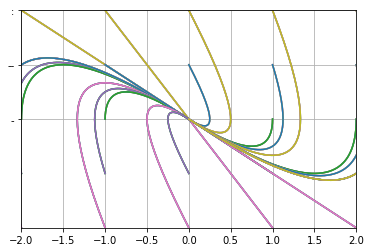

In [ ]:
a = sp.Symbol('a')
b = sp.Symbol('b')
A=sp.Matrix([[0,0],
           [a,b]])
delta=sp.det(A)
traza=sp.trace(A)
L=A.eigenvals()
V=A.eigenvects()

def vdp(t,z):
  x,y=z
  #Donde, j=y
  return[y,-2*x-3*y] #Ecuaciones del sistema

ti,tf=0,10
t=np.linspace(ti,tf,500)
for x0 in range(-2 , 3):
  for y0 in range(-2 , 3):
    for style in zip(styles):
      sol=solve_ivp(vdp,[ti,tf],[x0,y0],t_eval=t)
      plt.plot(sol.y[0],sol.y[1],style)
    plt.axis([-2,2,-2,2])
    plt.grid()
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.show()